<a href="https://colab.research.google.com/github/dzhurai/Python-Projects/blob/main/Data_Visualization_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження набору даних
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Study

# Assuming your data is in a CSV file named 'sales_data.csv'
sales_data = pd.read_csv('sales_data.csv') # Load data into sales_data DataFrame
# Виведення перших 5 рядків датасету sales_numeric
print(sales_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Study
   Order_Date      Time  Aging  Customer_Id Gender Device_Type  \
0  2018-01-01  10:11:40    5.0        29317   Male         Web   
1  2018-01-01  22:30:44    7.0        42270   Male         Web   
2  2018-01-01  21:55:31   10.0        14563   Male         Web   
3  2018-01-01  13:57:15    9.0        58601   Male         Web   
4  2018-01-01  15:17:41    2.0        48342   Male         Web   

  Customer_Login_type    Product_Category                 Product  Sales  \
0              Member  Auto & Accessories       Car Media Players  140.0   
1              Member  Auto & Accessories  Car Pillow & Neck Rest  231.0   
2              Member  Auto & Accessories            Car Speakers  211.0   
3              Member  Auto & Accessories                    Tyre  250.0   
4              Member  Auto & Accessories                    Tyre

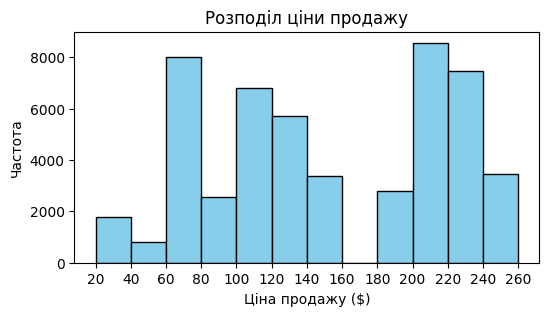

In [ ]:
#Побудуй гістограму для візуалізації розподілу ціни продажу (sales). Проаналізуй, які продажі зустрічаються найчастіше, який характер розподілу значень загалом.

# Створення гістограми для розподілу ціни продажу
# Створення меж бінгів з кроком 20
bin_edges = np.arange(20, sales_data['Sales'].max() + 20, 20)  # Визначаємо межі бінгів

# Створення гістограми для розподілу ціни продажу
plt.figure(figsize=(6, 3))
plt.hist(sales_data['Sales'], bins=bin_edges, color='skyblue', edgecolor='black')

# Додавання заголовку і міток осей
plt.title('Розподіл ціни продажу')
plt.xlabel('Ціна продажу ($)')
plt.ylabel('Частота')
plt.xticks(bin_edges)  # Налаштовуємо поділки осі X
plt.show()

###  Проаналізуй, які продажі зустрічаються найчастіше, який характер розподілу значень загалом
Найчайчастіше продажі ми маємо у цінановій категорії 60-80$ та

200-220$.

Розподіл цін продажу є зміщений в одну сторону, спад. При збільшенні ціни, йде спад кількості.



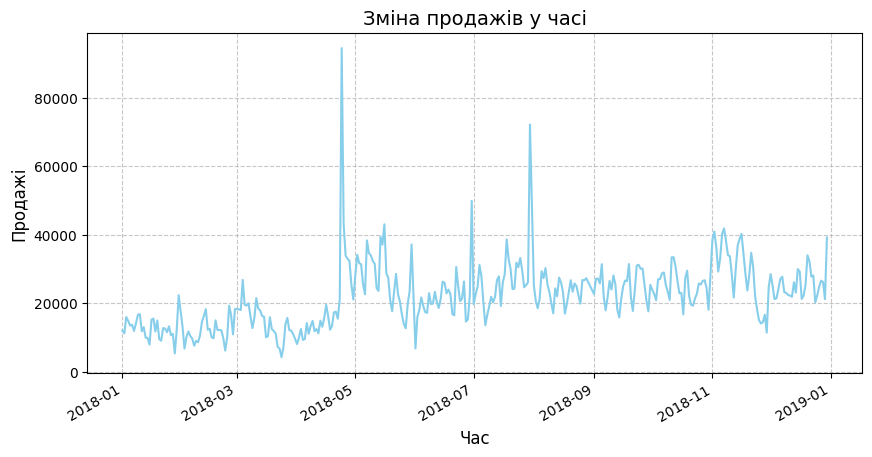

In [ ]:
#Створи лінійний графік, який показує зміну продажів (sales) у часі (order_date). Перед цим потрібно переконатись у тому, що стовпчик order_date має відповідний тип даних

# Перетворення стовпця Order_Date у тип datetime
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'])

# Сортування даних за датою
sales_data = sales_data.sort_values('Order_Date')

# Агрегація даних, якщо є дублікати дат
sales_data = sales_data.groupby('Order_Date')['Sales'].sum().reset_index()

# Створення графіка
plt.figure(figsize=(10, 5))
plt.plot(sales_data['Order_Date'], sales_data['Sales'], linestyle='-', color='skyblue')

# Налаштування графіка
plt.title('Зміна продажів у часі', fontsize=14)
plt.xlabel('Час', fontsize=12)
plt.ylabel('Продажі', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()  # Автоматичне форматування дат

# Відображення графіка
plt.show()

### Якою є ця тенденція згідно з графіком?
Загалом продажі мають ріст. Є декілька аномальних стрибків, у кінці 2018-04, у кінці 2018-06 та приблизно 2018-08.

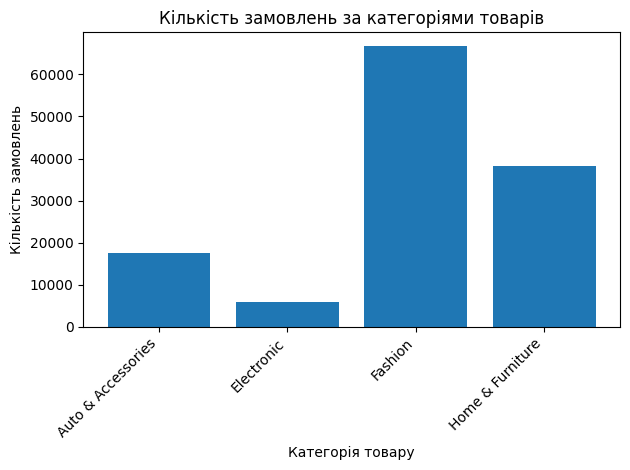

In [ ]:
#Побудуй стовпчастий графік, що показує кількість замовлень за категоріями товарів (Product_Category). Використовуй групування даних. Яка категорія найбільш популярна? Яка найменш популярна?
sales_data = pd.read_csv('sales_data.csv')
category_sales = sales_data.groupby('Product_Category')['Quantity'].sum().reset_index()

plt.bar(category_sales['Product_Category'], category_sales['Quantity'])
plt.xlabel('Категорія товару')
plt.ylabel('Кількість замовлень')
plt.title('Кількість замовлень за категоріями товарів')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Яка категорія найбільш популярна? Яка найменш популярна?
Найбільш популярна ***Fshion***

Найменш популярна ***Electronic***

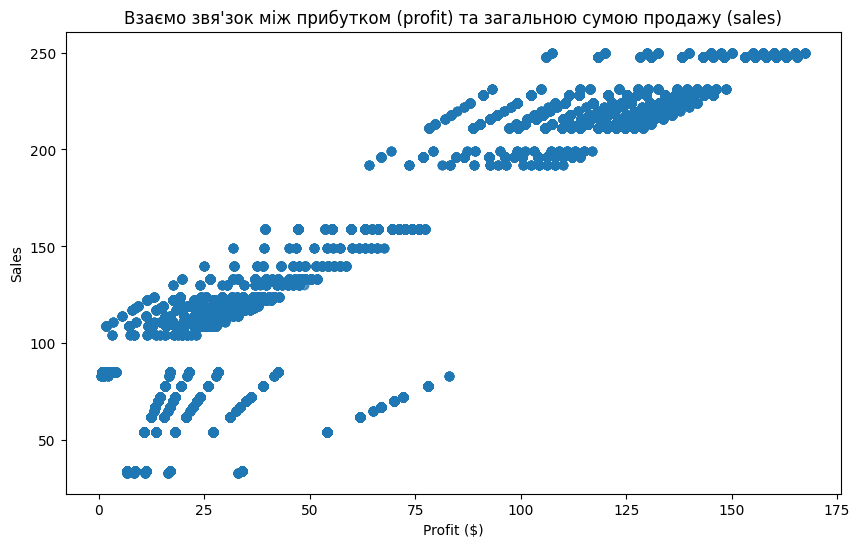

In [ ]:
#Створи діаграму розсіювання для візуалізації взаємозв'язку між прибутком (profit) та загальною сумою продажу (sales). Подумай, чи є зв'язок між цими показниками і який характер цього взаємозв'язку.
plt.figure(figsize=(10, 6))
plt.scatter(sales_data['Profit'], sales_data['Sales'], alpha=0.5)
plt.title("Взаємо звя'зок між прибутком (profit) та загальною сумою продажу (sales)")
plt.xlabel('Profit ($)')
plt.ylabel('Sales')
plt.show()

### Подумай, чи є зв'язок між цими показниками і який характер цього взаємозв'язку.
*Судячи з тендецій графіку, можна зробити висновок, що є Позитивний зв'язок - Більше продаж призводять до більшого прибутку.*





Text(0, 0.5, 'Продажі')

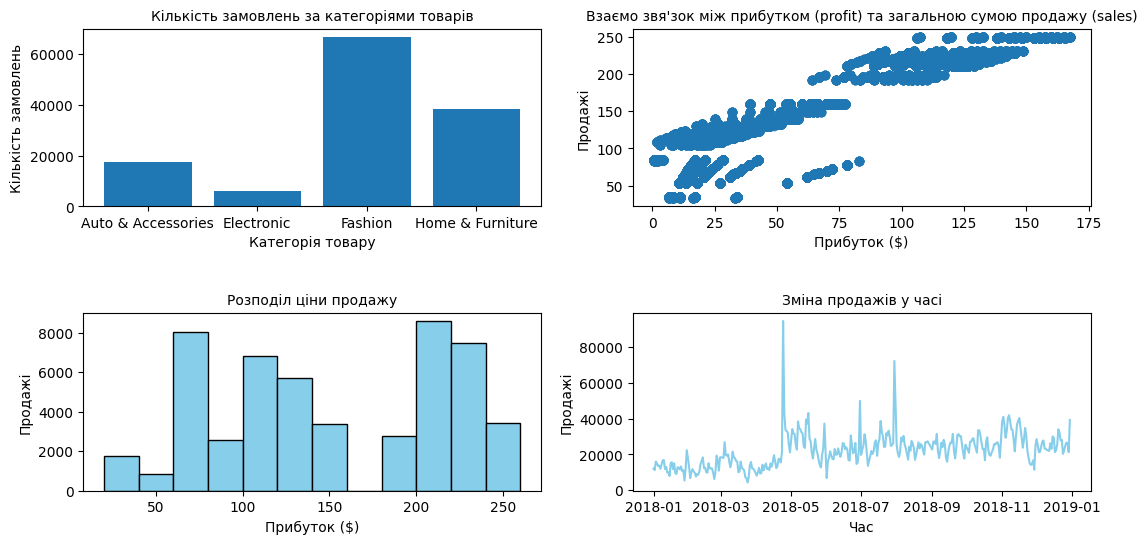

In [ ]:
#Створи масив графіків (2x2) з попередніх візуалізацій, щоб на одному малюнку побачити всі графіки та порівняти їх.


# Перетворення стовпця Order_Date у тип datetime
sales_data_original['Order_Date'] = pd.to_datetime(sales_data_original['Order_Date'])

# Сортування даних за датою
sales_data_original = sales_data_original.sort_values('Order_Date')

# Агрегація даних, якщо є дублікати дат
sales_data_time_series = sales_data_original.groupby('Order_Date')['Sales'].sum().reset_index() # store time series data separately


# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(13, 6))
plt.subplots_adjust(hspace=0.6)

#Кількість замовлень за категоріями товарів
ax[0, 0].bar(category_sales['Product_Category'], category_sales['Quantity'])
ax[0, 0].set_xlabel('Категорія товару')
ax[0, 0].set_ylabel('Кількість замовлень')
ax[0, 0].set_title('Кількість замовлень за категоріями товарів', fontsize=10)


#Взаємо звя'зок між прибутком (profit) та загальною сумою продажу (sales)
ax[0, 1].scatter(sales_data_original['Profit'], sales_data_original['Sales'], alpha=0.5)
ax[0, 1].set_xlabel('Прибуток ($)')
ax[0, 1].set_ylabel('Продажі')
ax[0, 1].set_title("Взаємо звя'зок між прибутком (profit) та загальною сумою продажу (sales)", fontsize=10)


#Розподіл ціни продажу
ax[1, 0].hist(sales_data_original['Sales'], bins=bin_edges, color='skyblue', edgecolor='black') #
ax[1, 0].set_xlabel('Прибуток ($)')
ax[1, 0].set_ylabel('Продажі')
ax[1, 0].set_title("Розподіл ціни продажу", fontsize=10)

#Зміна продажів у часі
ax[1, 1].plot(sales_data_time_series['Order_Date'], sales_data_time_series['Sales'], linestyle='-', color='skyblue')
ax[1, 1].set_title('Зміна продажів у часі', fontsize=10)
ax[1, 1].set_xlabel('Час')
ax[1, 1].set_ylabel('Продажі')